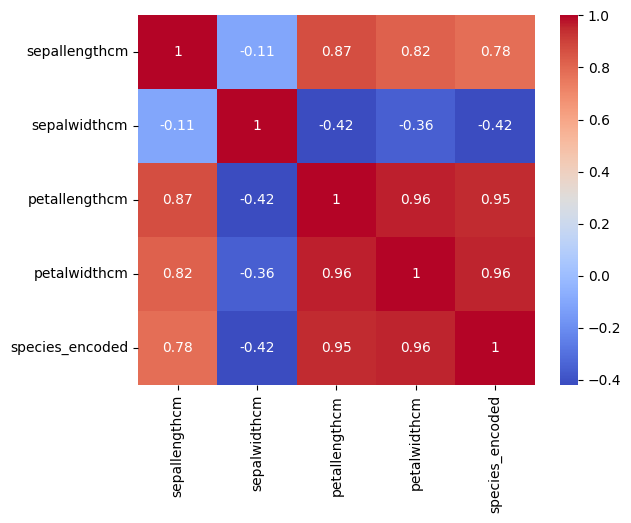

   sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm      species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [1]:
import pandas as pd

# 1️⃣ Load CSV and skip any extra headers
df = pd.read_csv('iris.csv', header=0)

# 2️⃣ Drop duplicate rows (including accidental header rows)
df = df.drop_duplicates()

# 3️⃣ Drop 'Id' column
if 'id' in df.columns or 'Id' in df.columns:
    df = df.drop(columns=[col for col in df.columns if col.lower() == 'id'])

# 4️⃣ Standardize column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# 5️⃣ Strip strings in 'species' column
df['species'] = df['species'].str.strip()

# 6️⃣ Encode species for ML
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# 7️⃣ Check numeric-only DataFrame for correlations
numeric_df = df.select_dtypes(include='number')

# 8️⃣ Correlation heatmap will work now
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 9️⃣ Save cleaned CSV (optional)
df.to_csv('iris_cleaned.csv', index=False)

# 10️⃣ Quick look
print(df.head())


In [3]:
# 1️⃣ Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2️⃣ Load and clean dataset
df = pd.read_csv('iris.csv', header=0)
df = df.drop_duplicates()
if 'id' in df.columns or 'Id' in df.columns:
    df = df.drop(columns=[col for col in df.columns if col.lower() == 'id'])
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df['species'] = df['species'].str.strip()
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# 3️⃣ Split features and target
X = df[['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm']]
y = df['species_encoded']

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


--- Random Forest ---
Accuracy: 0.9000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



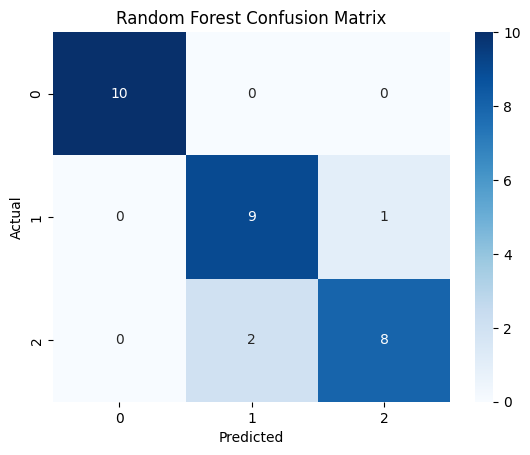

--- Logistic Regression ---
Accuracy: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



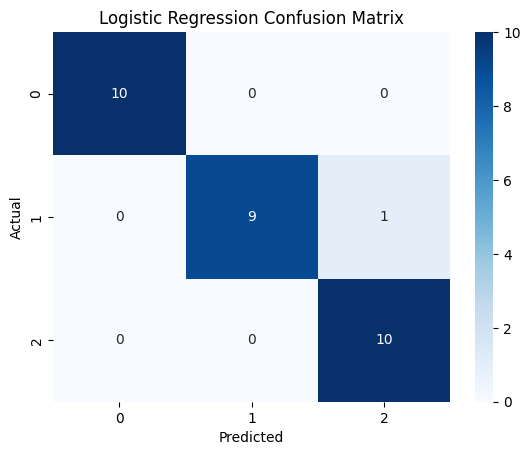

--- KNN ---
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



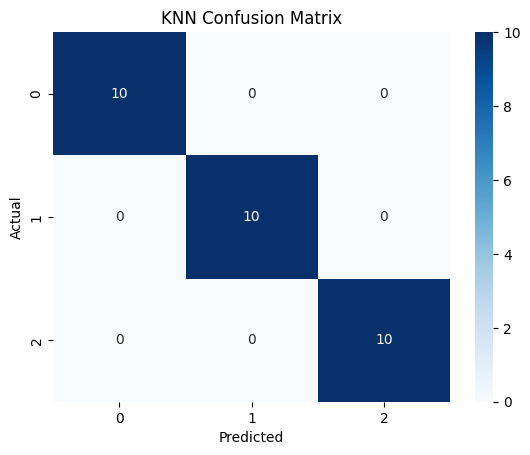

--- SVM ---
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



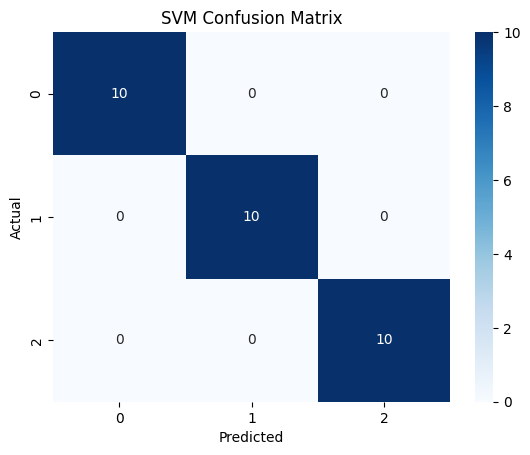

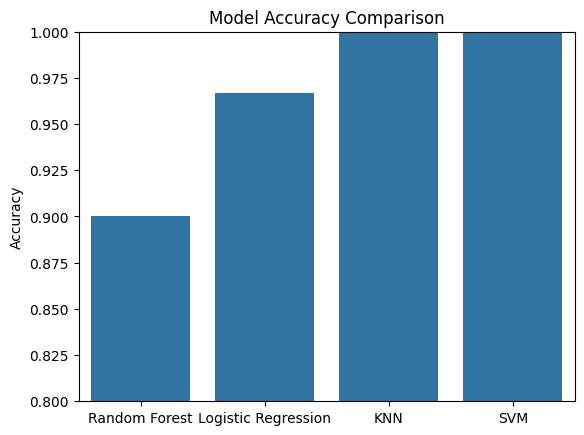

In [4]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', probability=True)
}

# Train each model and store accuracy
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Compare model accuracy
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1)
plt.show()


In [6]:

# Function to predict species
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    sample = [[sepal_length, sepal_width, petal_length, petal_width]]
    pred_encoded = model.predict(sample)
    return le.inverse_transform(pred_encoded)[0]

# Example: input measurements
sepal_length = 5.1
sepal_width = 3.5
petal_length = 1.4
petal_width = 0.2

predicted_species = predict_species(sepal_length, sepal_width, petal_length, petal_width)
print(f"The predicted Iris species is: {predicted_species}")


The predicted Iris species is: Iris-setosa


c:\Users\Admin\oasis\iris\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [7]:
import pickle

# Save the trained model
with open('iris_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the label encoder as well
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

print("Model and label encoder saved successfully!")


Model and label encoder saved successfully!
